In [1]:
import os
import torchvision
# import utils
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython import display
from PIL import Image
import pandas as pd
import shutil
from matplotlib import pyplot as plt
from math import pi
from matplotlib.patches import Ellipse


In [2]:
wee_ves_dir = '/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D'
# os.listdir(wee_ves_dir)
tsv_file = os.path.join(wee_ves_dir,'images-config.tsv')
df = pd.read_table(tsv_file,delim_whitespace=True,header=None)

# pd.read_table(tsv_file,delim_whitespace=True,header=0)

df = df.rename(columns={0: "label", 
                   1: "name",
                   2: "index",
                   4: "bodyheadszratio",
                   5: "bodyheadcolordiff",
                   6: "bodysz",
                   7: "bodycolor",
                   8: "bodycolorlighter"
                   })
# def clean_df(df)
features =  ["bodyheadszratio",
             "bodyheadcolordiff",
             "bodysz",
             "bodycolor",
             "bodycolorlighter"]
def extract_feature(x):
    x_new= x.split('=')[1]
    return x_new
     
for feature in features:
    df[feature] = df.apply(lambda row : extract_feature(row[feature]), axis = 1)

# for index, row in df.iterrows():
#     for feature in features:
#         # print(row[feature])
#         # print(row[feature].split('=')[0])
#         row[feature] = row[feature].split('=')[1]
    # break
for fea in features:
    df[fea] = df[fea].astype('float')
df

,label,name,index,3,bodyheadszratio,bodyheadcolordiff,bodysz,bodycolor,bodycolorlighter
0,0,weevil,0,0,0.33,0.15,0.65,0.12,0.0
1,0,weevil,1,1,0.25,0.05,0.65,0.18,0.0
2,0,weevil,2,2,0.38,0.14,0.54,0.06,0.0
3,0,weevil,3,3,0.38,0.22,0.55,0.05,0.0
4,0,weevil,4,4,0.43,0.00,0.43,0.13,1.0
...,...,...,...,...,...,...,...,...,...
195,1,vespula,195,195,0.62,0.30,0.47,0.23,0.0
196,1,vespula,196,196,0.58,0.55,0.53,0.20,1.0
197,1,vespula,197,197,0.80,0.35,0.52,0.22,1.0
198,1,vespula,198,198,0.45,0.63,0.39,0.14,1.0


In [23]:
df.iloc[13]

label                     0
name                 weevil
index                    13
3                        13
bodyheadszratio        0.34
bodyheadcolordiff      0.26
bodysz                 0.42
bodycolor              0.09
bodycolorlighter        1.0
Name: 13, dtype: object

In [22]:
df.iloc[14]

label                     0
name                 weevil
index                    14
3                        14
bodyheadszratio         0.4
bodyheadcolordiff      0.18
bodysz                 0.46
bodycolor              0.25
bodycolorlighter        1.0
Name: 14, dtype: object

In [24]:
1-0.25-0.18

0.5700000000000001

In [4]:
os.listdir(wee_ves_dir)

['szratio-contrast-2D-scatter.jpg',
 '.DS_Store',
 'images',
 'images-config.tsv',
 'szratio-contrast-2D-scatter.pdf']

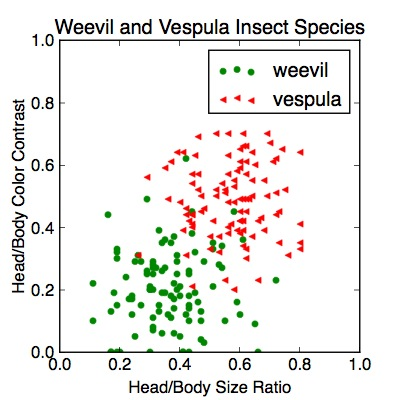

In [5]:
from PIL import Image
addr = '/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D/szratio-contrast-2D-scatter.jpg'
# addr = '/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D/szratio-contrast-2D-scatter.pdf'
display.display(display.Image(filename=addr))
# Image.open('/net/scratch/hanliu-shared/data/image-data/output/one-class_syn2_size-color-diff-2D/szratio-contrast-2D-scatter.jpg').show()
# image.show()

##  4 features

In [8]:
from PIL import Image, ImageDraw
def ellipse(output_path):
    image = Image.new("RGB", (400, 400), "white")
    draw = ImageDraw.Draw(image)
    draw.ellipse((25, 50, 175, 200), fill="red")
    # draw.ellipse((100, 150, 275, 300), outline="black", width=5,
                #  fill="yellow")
    image.show()
    # image.save(output_path)

# if __name__ == "__main__":
#     ellipse("ellipse.jpg")

In [9]:
output_dir = '/net/scratch/chacha/playground/result'
ellipse(os.path.join(output_dir,"ellipse.jpg"))

Error: no "view" rule for type "image/png" passed its test case
       (for more information, add "--debug=1" on the command line)


In [ ]:

os.getcwd()

'/net/scratch/chacha/playground'

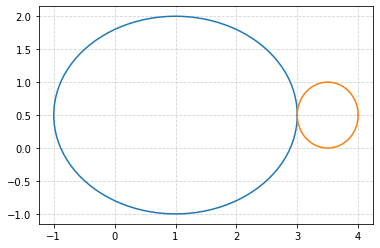

In [10]:

# body size
u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )
## u - a = u'+a'
u=3.5     #x-position of the center
v=0.5    #y-position of the center
a=0.5     #radius on the x-axis
b=0.5    #radius on the y-axis
plt.plot( u+a*np.cos(t) , v+b*np.sin(t) )

plt.grid(color='lightgray',linestyle='--')
plt.show()

In [11]:
# 1st ellipse
# (u_1,5) a_1,b_1
# 2d ellipse
# (5+a_1,5) (5-u_1, b_2)
# (u_1+a_2 = 5)

# Fixing random state for reproducibility
def draw_bug(a_1=2, b_1=1.5, a_2=0.3, b_2=0.5, random_seed=4, alpha1=1, alpha2=1):
    # np.random.seed(random_seed)
    # a_2 = 0.3
    u_1 = 5-a_2
    # a_1 = 2
    # b_1 = 1.5
    # b_2 = 0.5

    ell_1 = Ellipse(xy=(u_1,5),width=a_1*2,height=b_1*2) 
    # ells = [Ellipse(xy=np.random.rand(2) * 10,
    #                 width=np.random.rand(), height=np.random.rand(),
    #                 angle=np.random.rand() * 360)
    #         for i in range(NUM)]
    ell_2 = Ellipse(xy=(5+a_1,5),width=(5-u_1)*2,height=(b_2)*2) 

    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    # ax.axis('off')
    # for e in ells:
    ax.add_artist(ell_1)
    # alpha1 = np.random.rand()
    ell_1.set_alpha(alpha1)
    black_color ='#000000'
    ell_1.set_facecolor(black_color)
    ax.add_artist(ell_2)
    # alpha2 = np.random.rand()
    ell_2.set_alpha(alpha2)
    ell_2.set_facecolor(black_color)
    # e.set_clip_box(ax.bbox)
    # e.set_alpha(np.random.rand())
    # e.set_facecolor(np.random.rand(3))

    ## legs （u1, 5+b_1) （u1, 5-b_1) 
    leg_1_0 = (u_1, 5+b_1)
    leg_1_1 = (u_1-0.8, 5+b_1+0.4)
    leg_2_0 = (u_1, 5-b_1)
    leg_2_1 = (u_1-0.8, 5-b_1-0.4)

    x_values = [leg_1_0[0], leg_1_1[0]]
    y_values = [leg_1_0[1], leg_1_1[1]]
    plt.plot(x_values, y_values, color="black") 

    x_values = [leg_2_0[0], leg_2_1[0]]
    y_values = [leg_2_0[1], leg_2_1[1]]
    plt.plot(x_values, y_values, color="black") 

    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)

    plt.show()

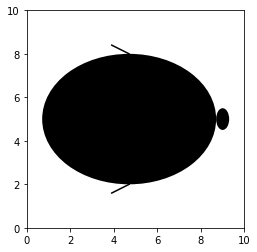

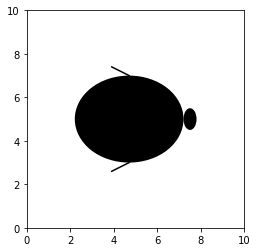

In [12]:
draw_bug(a_1=4, b_1=3, a_2=0.3, b_2=0.5, random_seed=4, alpha1=1, alpha2=1)
draw_bug(a_1=2.5, b_1=2, a_2=0.3, b_2=0.5, random_seed=4, alpha1=1, alpha2=1)

In [13]:
# Head/body size ratio 0.1--0.9
# Head/body size ratio = a_2 X b_2 / (a_1 X b_1)
np.random.rand()

0.5529992216164431

In [14]:
mu, sigma = 2.5, 1 # mean and standard deviation
s_body = np.random.uniform(1,3,10)
s_head = np.random.uniform(0.5,1,10)
# s = np.random.normal(mu, sigma, 1000)

In [15]:
print(max(s_body))
print(min(s_body))
# print(# np.mean(s))
print(max(s_head))
print(min(s_head))

2.927846658671827
1.451305779922476
0.9966880538573233
0.5051753646204479


1.6782628277416753 0.7074272246668294
0.355364125718547


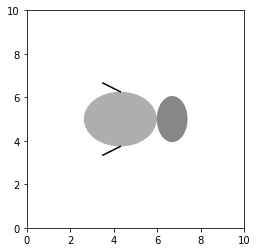

1.451305779922476 0.5051753646204479
0.2423240244986123


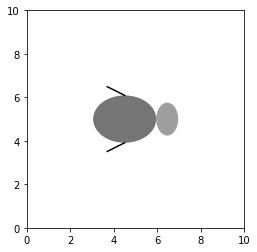

2.682947423234743 0.9966880538573233
0.2760095934546772


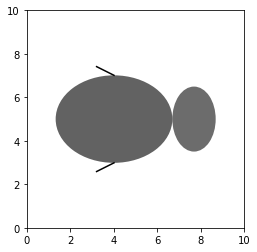

2.0545580923898474 0.7721327600460766
0.2824731045022248


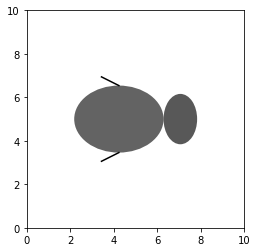

2.1872044716230494 0.9406979593600037
0.36995732387209684


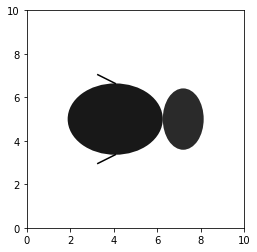

1.7832333844847283 0.913146752689048
0.5244387595492199


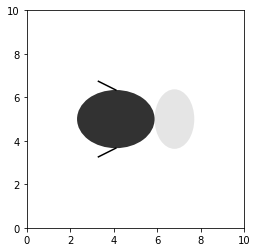

2.1468318598223046 0.8282858439057272
0.2977106768301004


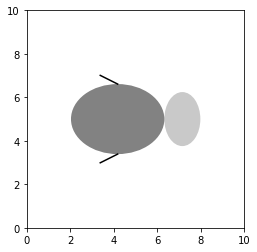

2.927846658671827 0.6961899813340746
0.11308080176147572


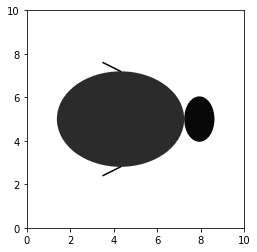

1.4610779078138278 0.5923482746232882
0.32872860981093444


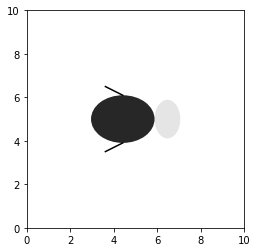

2.663748250267046 0.7965679182292451
0.1788501312528712


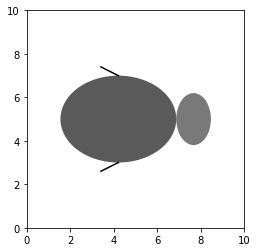

In [16]:
bug_list = []
count = 0
seeds = np.random.randint(10000, size=500) # make list of seeds

for a1,a2 in zip(s_body,s_head):
    np.random.seed(seeds[count])
    print(a1,a2)
    b1 = a1*0.75
    b2 = a2*1.5
    ratio = (a2*b2)/(a1*b1)
    print(ratio)
    alpha_1 = np.random.rand()
    alpha_2 = np.random.rand()
    draw_bug(a_1=a1, b_1=b1, a_2=a2, b_2=b2, random_seed=4, alpha1=alpha_1, alpha2=alpha_2)
    bug_list.append([count, a1, b1, a2, b2, alpha_1, alpha_2, ratio, alpha_1/alpha_2])
    count += 1